In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import seaborn as sns
# %matplotlib tk

In [2]:
# data = "../data/ident_wheels_real_indoor.csv"
data = "../data/robot_data.csv"

In [3]:
width, height = (6,6)

In [4]:
df = pd.read_csv(data,header=None, names=['wheel_l','wheel_r','beta_l','beta_r','alpha', 'i', 'j'])

In [5]:
df

,wheel_l,wheel_r,beta_l,beta_r,alpha,i,j
0,13.667083,15.014833,0.910432,1.025692,0.000000,4.0,4.0
1,3.989922,5.276173,-0.069388,-0.021717,-0.003247,5.0,3.0
2,13.434004,14.772097,0.865255,0.979679,0.000000,4.0,1.0
3,14.604564,15.942049,1.006339,1.120739,0.000000,3.0,0.0
4,3.381492,4.574070,-0.010082,0.005127,0.000000,1.0,1.0
...,...,...,...,...,...,...,...
935,3.245135,4.250640,-0.005125,0.005139,0.000000,3.0,5.0
936,3.243161,4.250255,-0.005009,0.005065,-0.005762,4.0,4.0
937,3.242076,4.252297,-0.005160,0.005174,0.000000,5.0,2.0
938,3.244541,4.255521,-0.005044,0.005084,-0.004324,4.0,1.0


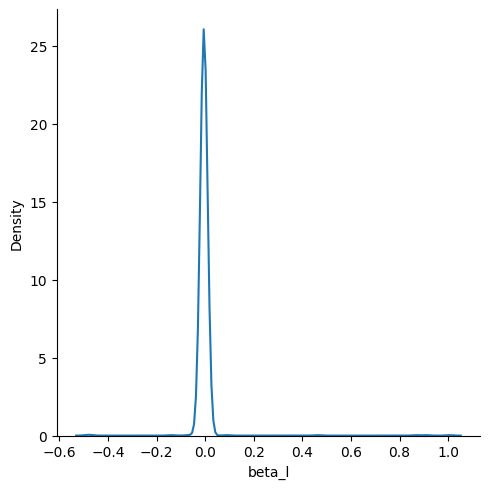

In [23]:
sns.displot(df, x="beta_l", kind="kde")
plt.show()

In [6]:
x = df[['i','j']].values
y = df[['beta_l','beta_r','alpha']].values

In [7]:
def generate_grid_plot(width, height, param):
    terrain_matrix = [[[] for j in range(width)] for i in range(height)]
    df.apply(lambda x: terrain_matrix[int(x.i)][int(x.j)].append(x[param]), axis=1)

    min_val = 0
    max_val = 0

    for i in range(height):
        for j in range(width):
            if len(terrain_matrix[i][j]):
                mean = np.mean(terrain_matrix[i][j])
            else:
                mean = 0

            if mean > max_val:
                max_val = mean
            
            if mean < min_val:
                min_val = mean

            terrain_matrix[i][j] = mean

    side = max(abs(min_val), abs(max_val))

    plt.matshow(terrain_matrix, vmin=-side, vmax=side, cmap='bwr')
    plt.title(param)
    plt.colorbar()
    plt.savefig(f'../data/{param}.jpg')
    plt.show()
            

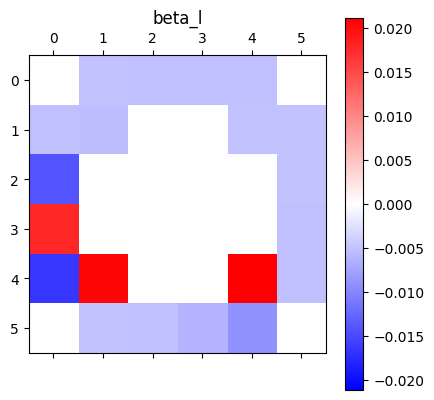

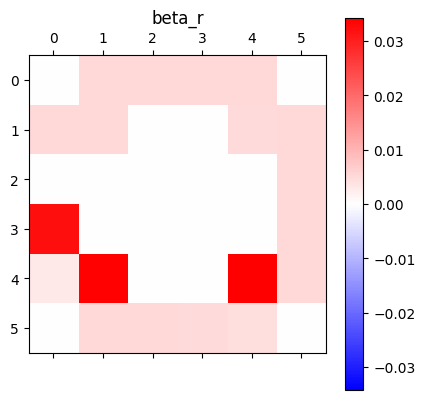

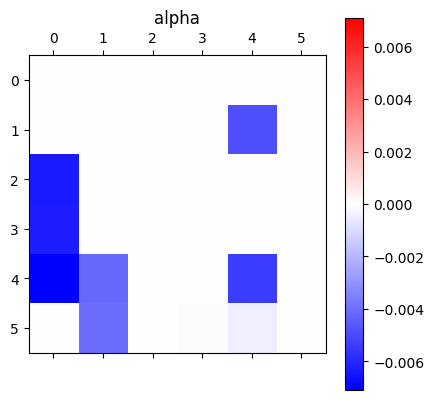

In [8]:
plt.close('all')
generate_grid_plot(width, height, 'beta_l')
generate_grid_plot(width, height, 'beta_r')
generate_grid_plot(width, height, 'alpha')

In [9]:
x = df[['wheel_l','wheel_r']].values
y = df[['beta_l','beta_r','alpha']].values

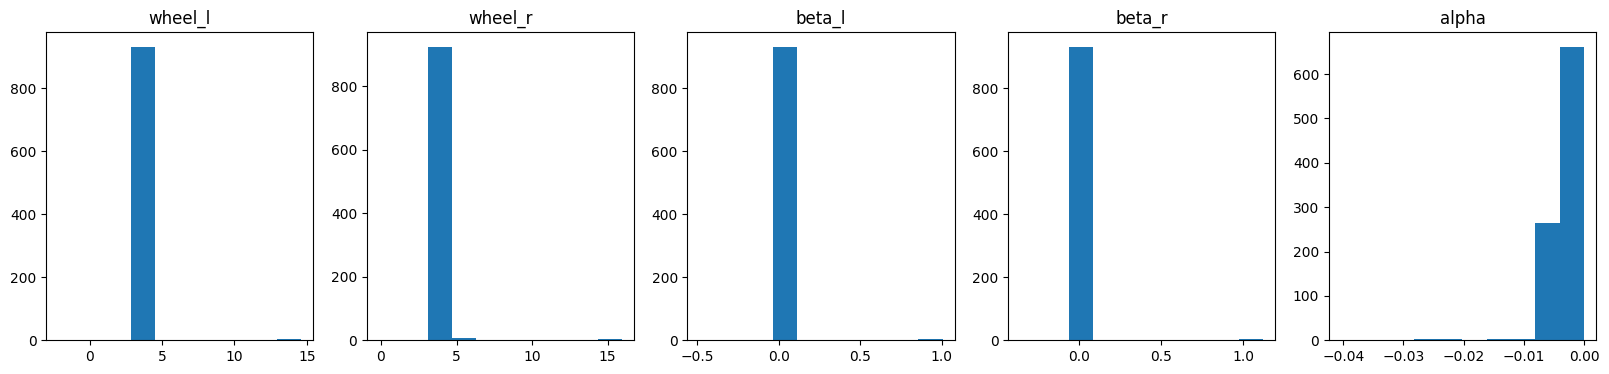

In [10]:
fig, ax = plt.subplots(1, 5, figsize=(20, 4))
ax[0].hist(x[..., 0])
ax[0].set_title('wheel_l')
ax[1].hist(x[..., 1])
ax[1].set_title('wheel_r')
# %% plot histogram to see if output distribution is well behaved, to see if it is neeeded a scaling
ax[2].hist(y[..., 0])
ax[2].set_title('beta_l')
ax[3].hist(y[..., 1])
ax[3].set_title('beta_r')
ax[4].hist(y[..., 2])
ax[4].set_title('alpha')
plt.show()

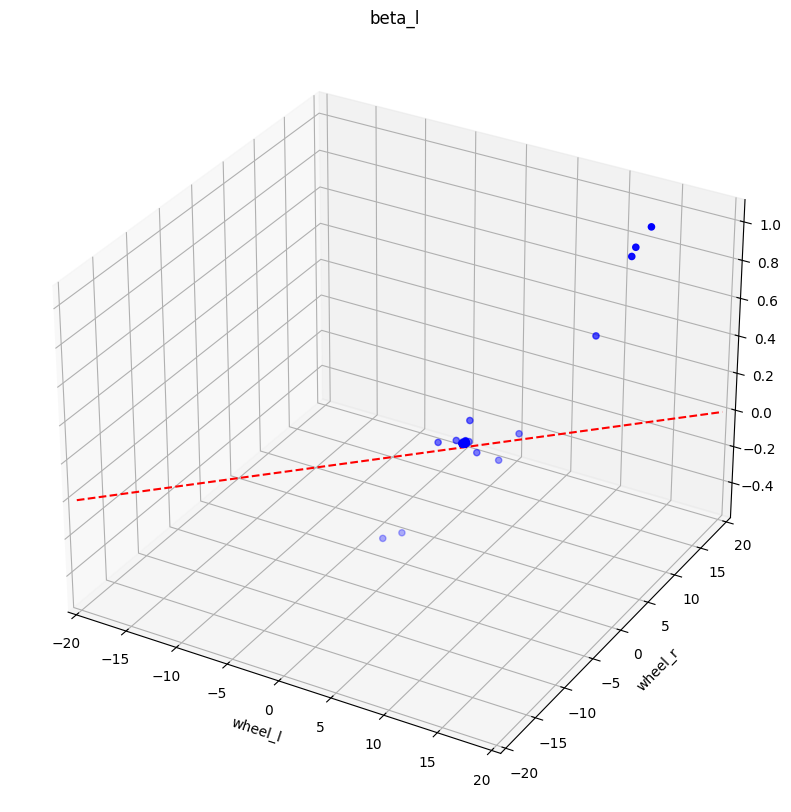

In [11]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.plot([-20,20],[-20,20],[0,0], "--", color="red")
ax.scatter(x[..., 0], x[..., 1], y[..., 0], color='blue')
ax.set_title('beta_l')
ax.set_xlabel('wheel_l')
ax.set_ylabel('wheel_r')
plt.show()

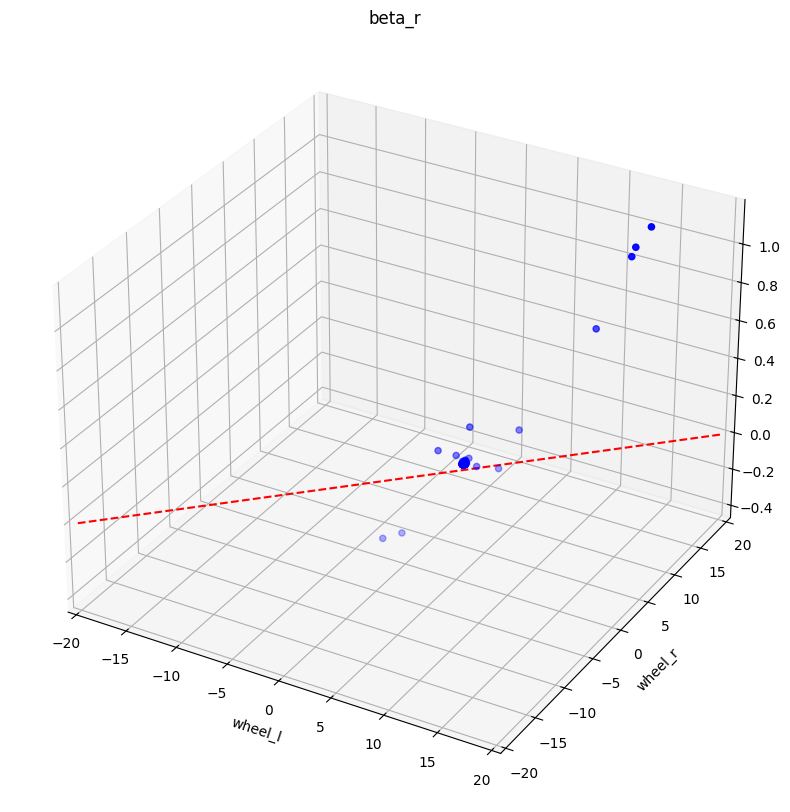

In [12]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.plot([-20,20],[-20,20],[0,0], "--", color="red")
ax.scatter(x[..., 0], x[..., 1], y[..., 1], color='blue')
ax.set_title('beta_r')
ax.set_xlabel('wheel_l')
ax.set_ylabel('wheel_r')
plt.show()

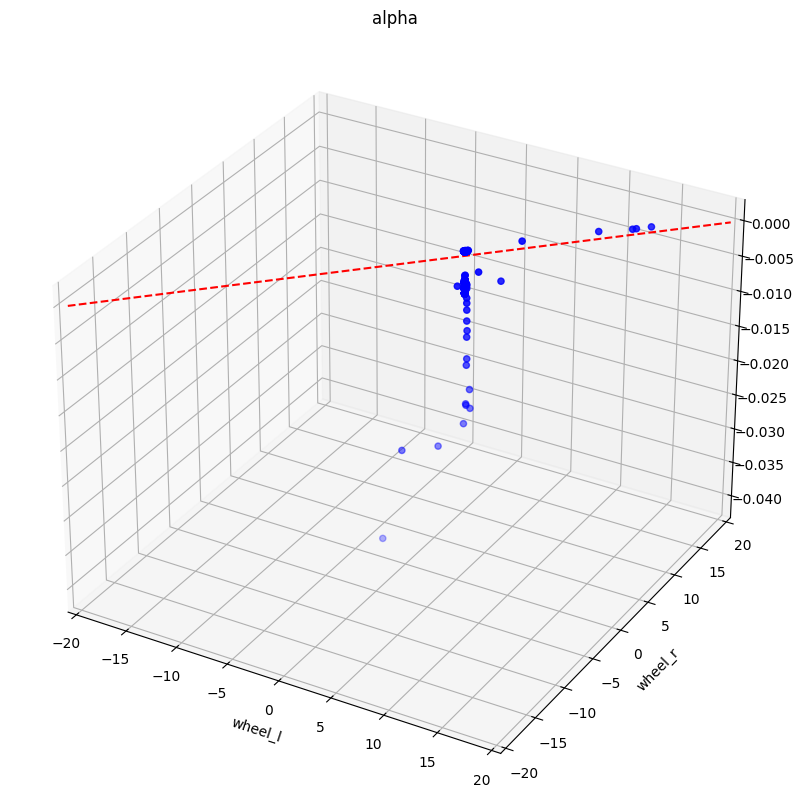

In [13]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.plot([-20,20],[-20,20],[0,0], "--", color="red")
ax.scatter(x[..., 0], x[..., 1], y[..., 2], color='blue')
ax.set_title('alpha')
ax.set_xlabel('wheel_l')
ax.set_ylabel('wheel_r')
plt.show()